In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing

In [ ]:
# #Mount google drive to colabs
# from google.colab import drive
# drive.mount('/content/drive')

# # Replace the file ID with your own
# file_id = '1f55GoXU0LmVy6fEEPxCGzJbMEecgT3Kw'
# link = f'https://drive.google.com/drive/u/3/folders/1eemQh2gRcr36DM4CZj00C3DiofZ_po_v'
# df = pd.read_csv("https://drive.google.com/drive/u/3/folders/1eemQh2gRcr36DM4CZj00C3DiofZ_po_v")

#Reading the .csv file
df = pd.read_csv('/content/Kickstarter.csv', encoding= 'unicode_escape')

In [ ]:
# Check for missing values
df.isnull().sum()

# # Handle missing values if necessary
# df = df.dropna()

# # Explore the dataset
# df.head()  # Display the first few rows of the dataset
# df.info()  # Get a summary of the dataset
# df.describe()  # Statistical summary of the numerical columns
# # df["Category"].unique()  # Check unique values in the "Category" column


name          10128
category      10128
deadline      10128
goal          10128
pledged       10128
status        10128
backers       10128
Unnamed: 7    26123
dtype: int64

In [ ]:
# Explore the dataset
df.head()  # Display the first few rows of the dataset

,name,category,deadline,goal,pledged,status,backers,Unnamed: 7
0,Safer Home,Hardware,3/7/2015 5:52,50000,0,failed,0,NaN
1,Gizbee Unlimited Removable Storage for Your T...,Gadgets,25/3/2016 19:30,87000,2030,canceled,15,NaN
2,Diposta - liberating people from their postal ...,Web,23/8/2016 13:18,100000,141,failed,3,NaN
3,Best Spray Bottle Ever - SureShot,Gadgets,7/3/2015 16:57,25000,3,failed,3,NaN
4,Fishtacular - The Ultimate Fishing Tool (Cance...,Apps,25/5/2015 20:04,50000,11336,canceled,19,NaN


In [ ]:
df.info()  # Get a summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26128 entries, 0 to 26127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16000 non-null  object 
 1   category    16000 non-null  object 
 2   deadline    16000 non-null  object 
 3   goal        16000 non-null  object 
 4   pledged     16000 non-null  object 
 5   status      16000 non-null  object 
 6   backers     16000 non-null  object 
 7   Unnamed: 7  5 non-null      float64
dtypes: float64(1), object(7)
memory usage: 1.6+ MB


In [ ]:
df.describe()  # Statistical summary of the numerical columns

,Unnamed: 7
count,5.000000
mean,4502.649250
std,6241.024102
min,1.452441
25%,119.793807
50%,741.000000
75%,7492.000000
max,14159.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26128 entries, 0 to 26127
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        16000 non-null  object 
 1   category    16000 non-null  object 
 2   deadline    16000 non-null  object 
 3   goal        16000 non-null  object 
 4   pledged     16000 non-null  object 
 5   status      16000 non-null  object 
 6   backers     16000 non-null  object 
 7   Unnamed: 7  5 non-null      float64
dtypes: float64(1), object(7)
memory usage: 1.6+ MB


In [ ]:
# drop 'Unnamed: 7'
df.drop(columns=['Unnamed: 7'], inplace=True)
df.dropna(inplace=True, how='all')

# rename all columns to not have a space at the end
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
# remove all rows with a 'category ' having only 1 record
df = df.groupby('category').filter(lambda x: len(x) > 1)
df['category'].value_counts()

Technology           3560
Apps                 2986
Web                  1949
Hardware             1905
Software             1558
Gadgets              1362
Wearables             536
DIY Electronics       419
3D Printing           338
Sound                 302
Robots                265
Flight                212
Camera Equipment      187
Space Exploration     160
Makerspaces           129
Fabrication Tools     127
Name: category, dtype: int64

In [ ]:
# remove all rows with a 'category ' having only 1 record
df = df.groupby('category').filter(lambda x: len(x) > 1)
df['category'].value_counts()

Technology           3560
Apps                 2986
Web                  1949
Hardware             1905
Software             1558
Gadgets              1362
Wearables             536
DIY Electronics       419
3D Printing           338
Sound                 302
Robots                265
Flight                212
Camera Equipment      187
Space Exploration     160
Makerspaces           129
Fabrication Tools     127
Name: category, dtype: int64

In [ ]:
df['deadline'].head()

# convert 'deadline' to datetime
df['deadline'] = pd.to_datetime(df['deadline'])

# get the year from 'deadline'
df['deadline_year'] = df['deadline'].dt.year

# get the month from 'deadline'
df['deadline_month'] = df['deadline'].dt.month

df['deadline_year'].value_counts()

2015    5958
2016    4330
2014    3624
2013    1051
2012     479
2011     269
2017     129
2010     128
2009      27
Name: deadline_year, dtype: int64

In [ ]:
df['status'].value_counts()

# drop rows with status undefined
df = df[df['status'] != 'undefined']


In [ ]:
df['status'].value_counts()

failed        10063
successful     3101
canceled       2245
live            390
suspended       193
Name: status, dtype: int64

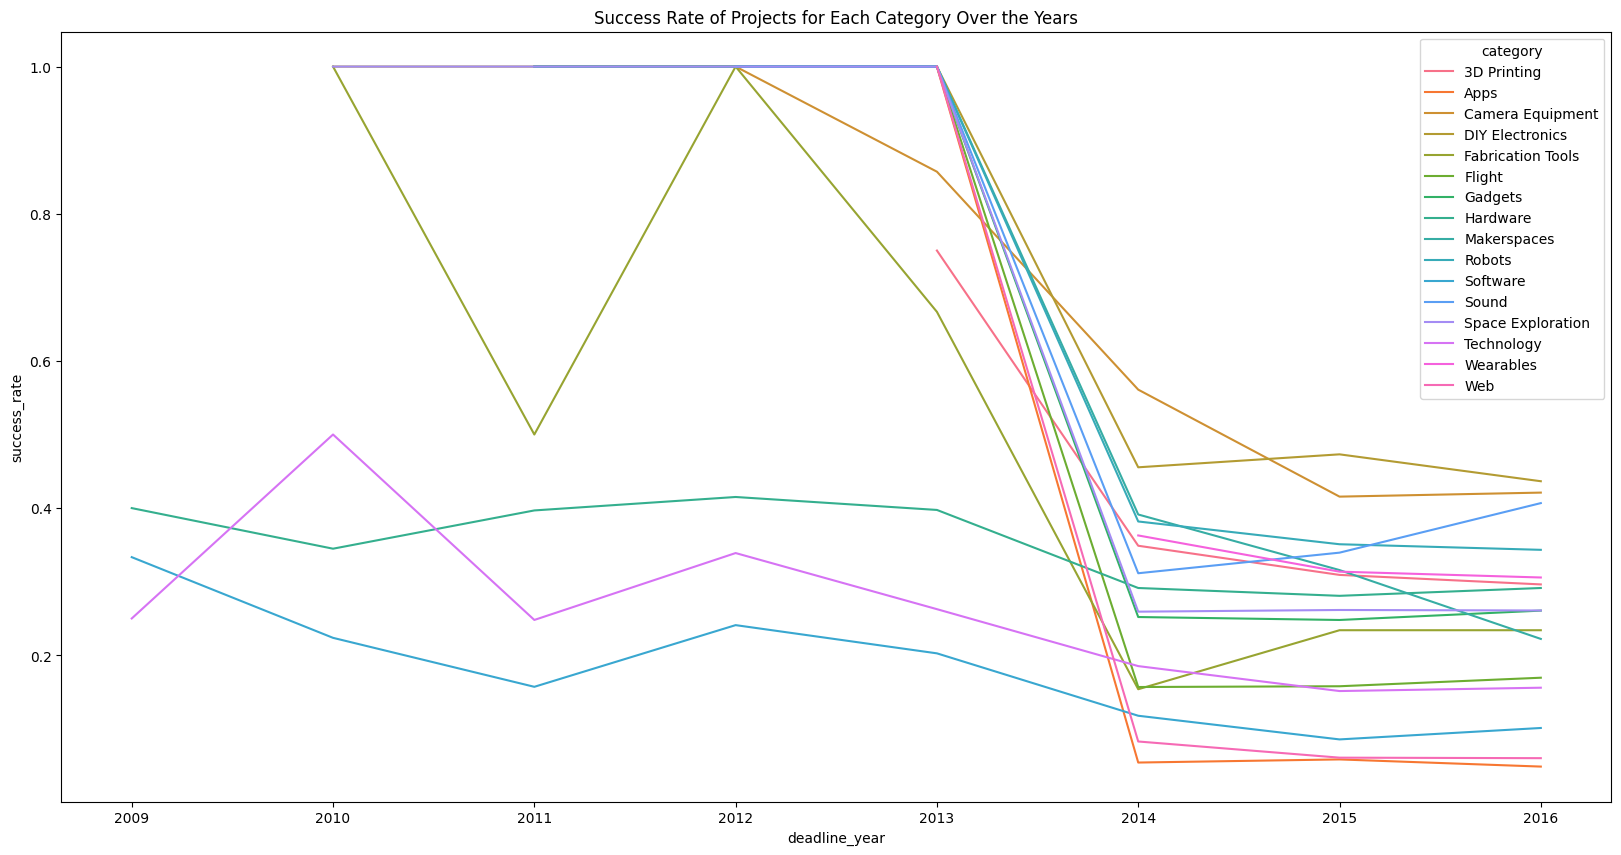

In [ ]:
# Show the success rate of projects for each category over the years. status = successful / total projects is the success rate
# Path: explore.ipynb

# get the total number of projects for each category for each year
df_total = df.groupby(['category', 'deadline_year']).size().reset_index(name='total')

# get the number of successful projects for each category for each year
df_success = df[df['status'] == 'successful'].groupby(['category', 'deadline_year']).size().reset_index(name='success')

# merge the two dataframes
df_success_rate = pd.merge(df_total, df_success, on=['category', 'deadline_year'])

# calculate the success rate
df_success_rate['success_rate'] = df_success_rate['success'] / df_success_rate['total']

df_success_rate.head()

# plot the success rate for each category over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x='deadline_year', y='success_rate', hue='category', data=df_success_rate)
plt.title('Success Rate of Projects for Each Category Over the Years')
plt.show()


In [ ]:
df["category"].unique()  # Check unique values in the "Category" column


array(['Hardware', 'Gadgets', 'Web', 'Apps', 'Technology', 'Software',
       'Flight', 'Makerspaces', 'Fabrication Tools', 'Sound',
       'DIY Electronics', 'Camera Equipment', '3D Printing', 'Wearables',
       'Space Exploration', 'Robots'], dtype=object)

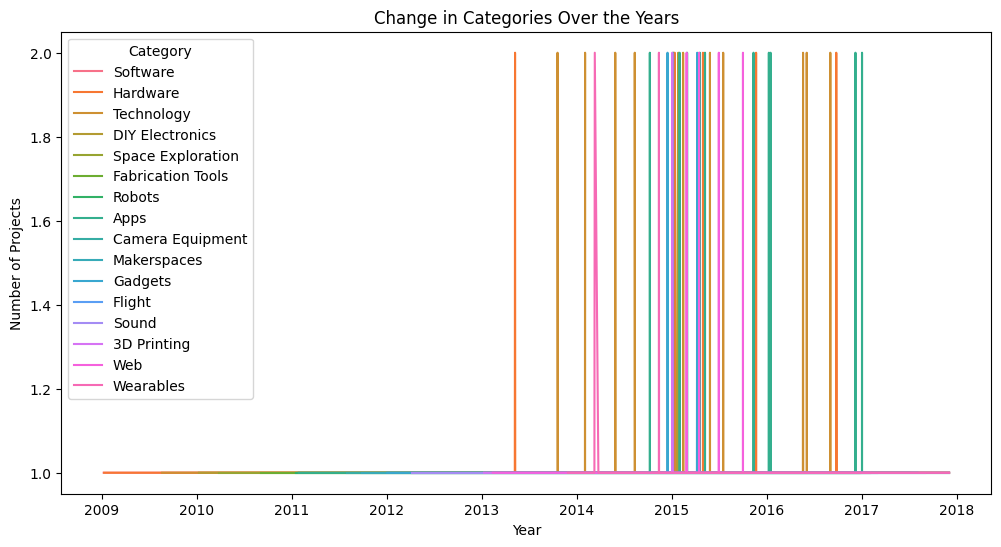

In [ ]:
# Group by year and category, count the number of projects in each category for each year
category_counts = df.groupby(["deadline", "category"]).size().reset_index(name="Count")

# Create a line plot to show the change in categories over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_counts, x="deadline", y="Count", hue="category")
plt.title("Change in Categories Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.legend(title="Category")
plt.show()

In [122]:
# Calculate the average number of backers per project for each category
avg_backers = df.groupby("category")["backers"].mean().reset_index(name="sucessful")

# Group by category and calculate the success rate for each category
success_rate_by_category = df.groupby("category")["status"].apply(lambda x: (x == "successful").mean()).reset_index(name="SuccessRate")

# Create a scatter plot to show the popularity of categories against the success rate of projects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_backers, x="AverageBackers", y="SuccessRate", hue="Category", s=100)
plt.title("Popularity of Categories vs. Success Rate")
plt.xlabel("Average Backers per Project")
plt.ylabel("Success Rate")
plt.legend(title="Category")
plt.show()


ValueError: ignored

<Figure size 1000x600 with 0 Axes>